<a href="https://colab.research.google.com/github/Sirabhop/Preclinical-AD-EEG-classification/blob/master/EEG_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne

     |████████████████████████████████| 6.6MB 2.6MB/s 


In [2]:
import os
import mne

from mne.preprocessing import compute_proj_eog
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* **Denoising comparing picture**

In [18]:
os.chdir('/content/drive/My Drive/EEG Data')
  
eog_chs = ('Leye','Reye','UBlink','DBlink','LMast','RMast')
exclude_chs = ('EXG7','EXG8','GSR1','GSR2','Erg1','Erg2','Resp','Plet','Temp') 
chn_names = ['Fp1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3',
               'Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8',
               'FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz']
raw = mne.io.read_raw_bdf('SS8.bdf', exclude = exclude_chs, eog = eog_chs, stim_channel = 'Status', preload = True)

 #Filter
raw.filter(l_freq = 0.5, h_freq = 45)
raw.notch_filter(freqs = (50, 100))

Extracting EDF parameters from /content/drive/.shortcut-targets-by-id/12z4LP3ZseBTu5H_CzdffptpTFzogZTMp/EEG Data/SS8.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4790271  =      0.000 ...  2339.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 13517 samples (6.600 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (fi

<RawEDF | SS8.bdf, 39 x 4790272 (2339.0 s), ~1.39 GB, data loaded>

In [16]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 32 EEG, 6 EOG, 1 STIM
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2020-03-17 14:10:04 UTC
 nchan: 39
 projs: EOG-eeg--0.200-0.200-PCA-01: on
 sfreq: 2048.0 Hz
>

In [11]:
eog_projs, _ = compute_proj_eog(raw, n_eeg = 1, reject=None, no_proj=True)
raw_bf = raw.copy()
raw.add_proj(eog_projs).apply_proj()

Running EOG SSP computation
EOG channel index for this subject is: [32 33 34 35 36 37]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 32768 samples (16.000 sec)

Now detecting blinks and generating corresponding events
Found 30 significant peaks
Number of EOG events detected : 30
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass f

<RawEDF | SS4.bdf, 39 x 4032512 (1969.0 s), ~1.17 GB, data loaded>

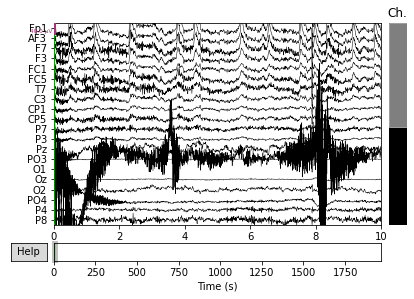

In [12]:
fig_raw = raw_bf.plot()

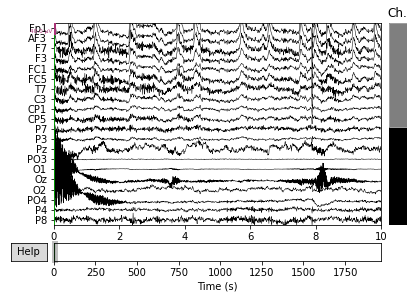

In [13]:
fig_raw2 = raw.plot()

* **Epoching trigger picture**

Trigger channel has a non-zero initial value of 65540 (consider using initial_event=True to detect this event)
14 events found
Event IDs: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]


<ipython-input-22-e7838bb17e55>:19: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, event_id=event_dict, sfreq = 2048)


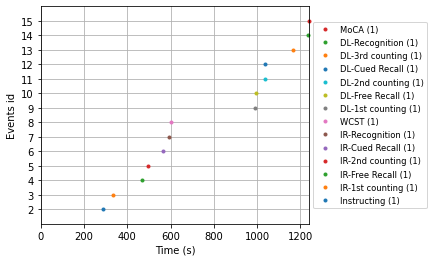

<Figure size 432x288 with 0 Axes>

In [22]:
#Epoching
events = mne.find_events(raw, stim_channel='Status',)
event_dict = { 
              'Instructing': 2, 
              'IR-1st counting': 3,
              'IR-Free Recall': 4, 
              'IR-2nd counting': 5, 
              'IR-Cued Recall': 6,
              'IR-Recognition': 7,
              'WCST': 8,
              'DL-1st counting': 9,
              'DL-Free Recall': 10, 
              'DL-2nd counting': 11, 
              'DL-Cued Recall': 12,
              'DL-3rd counting': 13,
              'DL-Recognition': 14,
              'MoCA': 15
              }

fig = mne.viz.plot_events(events, event_id=event_dict, sfreq = 2048)
plt.savefig('/content/drive/My Drive/My Project/Senior Project-Dementia/Results/Graphs/event_id.png')

In [0]:
epoch = mne.Epochs(raw, events, preload = True)